In [1]:
import pandas as pd
import random
import numpy
import math
import seaborn as sns
from sklearn.utils import shuffle
from matplotlib import pyplot
from collections import Counter

### Load GAN generated data

In [2]:
GAN_Bot = pd.read_csv('GAN_generation/GAN_Generated_Data/Standard_GAN_generated_Bot.csv', sep=',')
WGAN_GP_Bot = pd.read_csv('GAN_generation/GAN_Generated_Data/WGAN_GP_generated_Bot.csv', sep=',')

GAN_BF_SSH_Patator = pd.read_csv('GAN_generation/GAN_Generated_Data/Standard_GAN_generated_BF_SSH_Patator.csv', sep=',')
WGAN_BF_SSH_Patator = pd.read_csv('GAN_generation/GAN_Generated_Data/WGAN_GP_generated_BF_SSH_Patator.csv', sep=',')

GAN_BF_FTP_Patator = pd.read_csv('GAN_generation/GAN_Generated_Data/Standard_GAN_generated_BF_FTP_Patator.csv', sep=',')
WGAN_BF_FTP_Patator = pd.read_csv('GAN_generation/GAN_Generated_Data/WGAN_GP_generated_BF_FTP_Patator.csv', sep=',')

GAN_WA_Brute_Force = pd.read_csv('GAN_generation/GAN_Generated_Data/Standard_GAN_generated_WA_Brute_Force.csv', sep=',')
WGAN_WA_Brute_Force = pd.read_csv('GAN_generation/GAN_Generated_Data/WGAN_GP_generated_WA_Brute_Force.csv', sep=',')

GAN_WA_XSS = pd.read_csv('GAN_generation/GAN_Generated_Data/Standard_GAN_generated_WA_XSS.csv', sep=',')
WGAN_WA_XSS = pd.read_csv('GAN_generation/GAN_Generated_Data/WGAN_GP_generated_WA_XSS.csv', sep=',')

GAN_DoS_GoldenEye = pd.read_csv('GAN_generation/GAN_Generated_Data/Standard_GAN_generated_DoS_GoldenEye.csv', sep=',')
WGAN_DoS_GoldenEye = pd.read_csv('GAN_generation/GAN_Generated_Data/WGAN_GP_generated_DoS_GoldenEye.csv', sep=',')

GAN_DoS_Hulk = pd.read_csv('GAN_generation/GAN_Generated_Data/Standard_GAN_generated_DoS_Hulk.csv', sep=',')
WGAN_DoS_Hulk = pd.read_csv('GAN_generation/GAN_Generated_Data/WGAN_GP_generated_DoS_Hulk.csv', sep=',')

GAN_DoS_Slowhttptest = pd.read_csv('GAN_generation/GAN_Generated_Data/Standard_GAN_generated_DoS_Slowhttptest.csv', sep=',')
WGAN_DoS_Slowhttptest = pd.read_csv('GAN_generation/GAN_Generated_Data/WGAN_GP_generated_DoS_Slowhttptest.csv', sep=',')

GAN_DoS_Slowlori = pd.read_csv('GAN_generation/GAN_Generated_Data/Standard_GAN_generated_DoS_Slowlori.csv', sep=',')
WGAN_DoS_Slowlori = pd.read_csv('GAN_generation/GAN_Generated_Data/WGAN_GP_generated_DoS_Slowlori.csv', sep=',')


### Load original data

In [3]:
Bot = pd.read_csv('GAN_generation/Bot_Attack_Data_for_GAN.csv', sep=',')


BF_SSH_Patator = pd.read_csv('GAN_generation/Brute_Force_SSH_Patator_Data.csv', sep=',')

BF_FTP_Patator = pd.read_csv('GAN_generation/Brute_Force_FTP_Patator_Data.csv', sep=',')


WA_Brute_Force = pd.read_csv('GAN_generation/Web_Attack_Brute_Force_Data.csv', sep=',')

WA_XSS = pd.read_csv('GAN_generation/Web_Attack_XSS_Data.csv', sep=',')


DoS_GoldenEye = pd.read_csv('GAN_generation/Dos_GoldenEye_Data.csv', sep=',')

DoS_Hulk = pd.read_csv('GAN_generation/DoS_Hulk_Data.csv', sep=',')

DoS_Slowhttptest = pd.read_csv('GAN_generation/DoS_Slowhttptest_Data.csv', sep=',')

DoS_Slowlori = pd.read_csv('GAN_generation/DoS_Slowlori_Data.csv', sep=',')

### Load the pre-processed training set 

In [4]:
Bot_train = pd.read_csv('Train_test_data/Bot_train.csv', sep=',')

WebAttack_train = pd.read_csv('Train_test_data/WebAttack_train.csv', sep=',') 

Brute_Force_train = pd.read_csv('Train_test_data/Brute_Force_train.csv', sep=',') 

Dos_train = pd.read_csv('Train_test_data/Dos_train.csv', sep=',')

### GAN generated data pre-processing

In [5]:
# change the generated column names to the original ones
for i in [GAN_Bot, WGAN_GP_Bot]:
    i.columns = Bot_train.columns

for i in [GAN_BF_SSH_Patator, WGAN_BF_SSH_Patator, GAN_BF_FTP_Patator, WGAN_BF_FTP_Patator]: 
    i.columns = Brute_Force_train.columns

for i in [GAN_WA_Brute_Force, WGAN_WA_Brute_Force, GAN_WA_XSS, WGAN_WA_XSS]:
    i.columns = WebAttack_train.columns

for i in [GAN_DoS_GoldenEye, WGAN_DoS_GoldenEye, GAN_DoS_Hulk, WGAN_DoS_Hulk, GAN_DoS_Slowhttptest, WGAN_DoS_Slowhttptest, GAN_DoS_Slowlori, WGAN_DoS_Slowlori]:
    i.columns = Dos_train.columns


In [6]:
# Change the label values to the original ones 
GAN_Bot[' Label']=1
WGAN_GP_Bot[' Label']=1

GAN_BF_SSH_Patator[' Label']=2
WGAN_BF_SSH_Patator[' Label']=2

GAN_BF_FTP_Patator[' Label']=1
WGAN_BF_FTP_Patator[' Label']=1

GAN_WA_Brute_Force[' Label']=1
WGAN_WA_Brute_Force[' Label']=1

GAN_WA_XSS[' Label']=2
WGAN_WA_XSS[' Label']=2

GAN_DoS_GoldenEye[' Label']=1
WGAN_DoS_GoldenEye[' Label']=1

GAN_DoS_Hulk[' Label']=2
WGAN_DoS_Hulk[' Label']=2

GAN_DoS_Slowhttptest[' Label']=3
WGAN_DoS_Slowhttptest[' Label']=3

GAN_DoS_Slowlori[' Label']=4
WGAN_DoS_Slowlori[' Label']=4

In [7]:
# Binary atributes transformation
for i in [GAN_Bot, WGAN_GP_Bot, GAN_BF_SSH_Patator, WGAN_BF_SSH_Patator, GAN_BF_FTP_Patator, WGAN_BF_FTP_Patator, GAN_WA_Brute_Force, WGAN_WA_Brute_Force, GAN_WA_XSS, WGAN_WA_XSS, GAN_DoS_GoldenEye, WGAN_DoS_GoldenEye, GAN_DoS_Hulk, WGAN_DoS_Hulk, GAN_DoS_Slowhttptest, WGAN_DoS_Slowhttptest, GAN_DoS_Slowlori, WGAN_DoS_Slowlori]:
    for j in [i['Active Mean'], i[' Active Std'], i[' Idle Std'], i['Fwd PSH Flags'], i['FIN Flag Count'], i[' RST Flag Count'], i[' ACK Flag Count'], i[' URG Flag Count']]:
        j[j<0.5]=0
        j[j>=0.5]=1

C:\Users\Elisa Valente\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Elisa Valente\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### GAN generated data Shuffle

In [8]:
for i in [GAN_Bot, WGAN_GP_Bot, GAN_BF_SSH_Patator, WGAN_BF_SSH_Patator, GAN_BF_FTP_Patator, WGAN_BF_FTP_Patator, GAN_WA_Brute_Force, WGAN_WA_Brute_Force, GAN_WA_XSS, WGAN_WA_XSS, GAN_DoS_GoldenEye, WGAN_DoS_GoldenEye, GAN_DoS_Hulk, WGAN_DoS_Hulk, GAN_DoS_Slowhttptest, WGAN_DoS_Slowhttptest, GAN_DoS_Slowlori, WGAN_DoS_Slowlori]:
    i=shuffle(i)

### Euclidean Distance & Histograms

Euclidean Distance of  Source Port: 0.003261008311734352


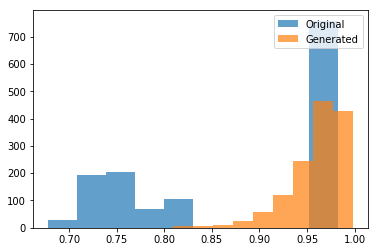

Euclidean Distance of  Protocol: 0.0029297469523285966


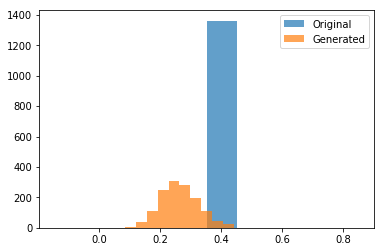

Euclidean Distance of Total Length of Fwd Packets: 0.003856942893510003


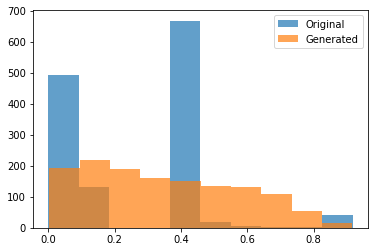

Euclidean Distance of  Fwd Packet Length Min: 2.0930420435373285e-05


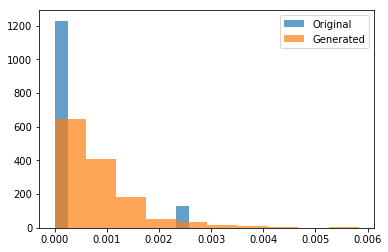

Euclidean Distance of Flow Bytes/s: 0.004641192515609786


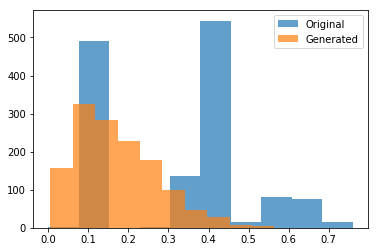

Euclidean Distance of  Flow Packets/s: 0.004952044044118091


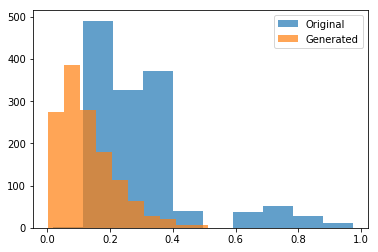

Euclidean Distance of  Fwd IAT Max: 0.00430637434713459


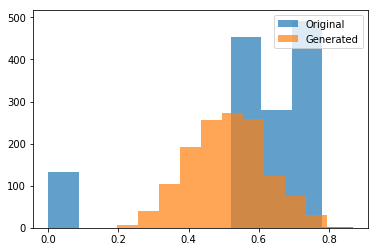

Euclidean Distance of  Fwd IAT Min: 0.004445880731765622


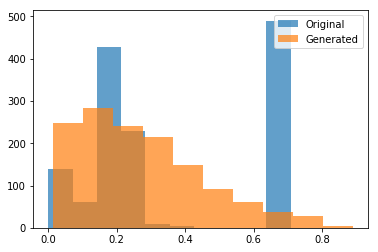

Euclidean Distance of Bwd IAT Total: 0.0036427699661722235


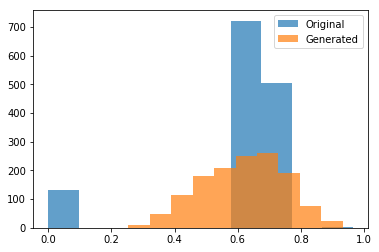

Euclidean Distance of Fwd PSH Flags: 0.0


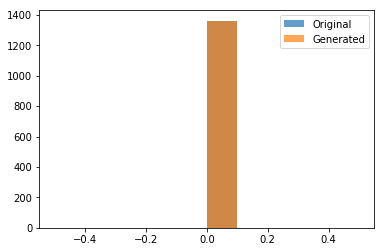

Euclidean Distance of  Fwd Header Length: 0.0031155133406852364


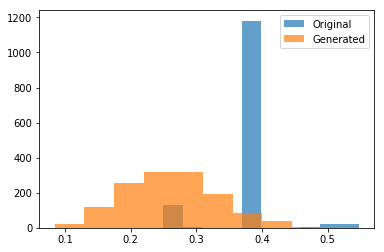

Euclidean Distance of  Bwd Packets/s: 0.0037514344695128567


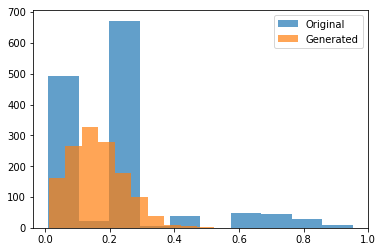

Euclidean Distance of FIN Flag Count: 0.0


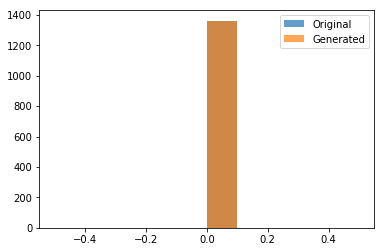

Euclidean Distance of  RST Flag Count: 0.0


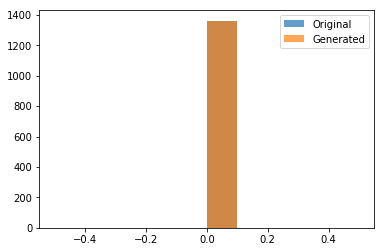

Euclidean Distance of  ACK Flag Count: 0.008473594852807345


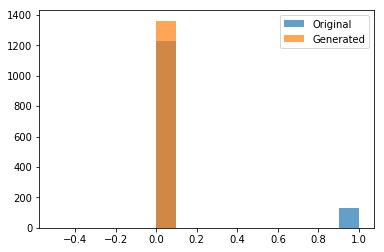

Euclidean Distance of  URG Flag Count: 0.007635786073044279


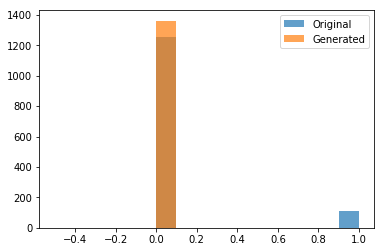

Euclidean Distance of  Down/Up Ratio: 0.0018061448513889496


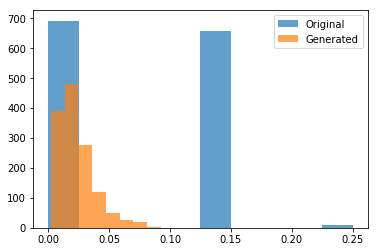

Euclidean Distance of  Avg Bwd Segment Size: 0.0002032189994550676


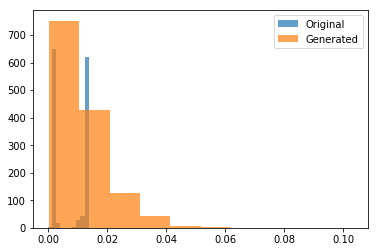

Euclidean Distance of  act_data_pkt_fwd: 1.7364324368074415e-05


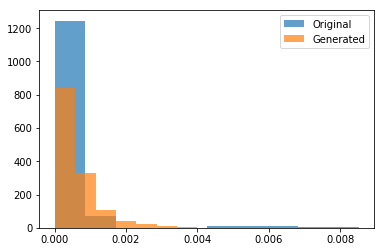

Euclidean Distance of  min_seg_size_forward: 0.0017172252091809622


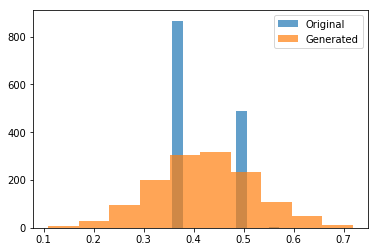

Euclidean Distance of Active Mean: 0.0006202513715416111


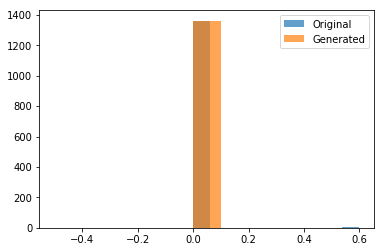

Euclidean Distance of  Active Std: 0.0005854684152897653


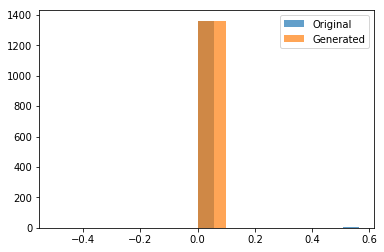

Euclidean Distance of  Idle Std: 0.0005703664929815457


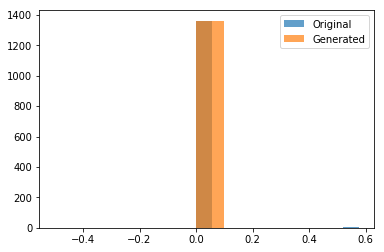

Euclidean Distance of  Label: 0.0


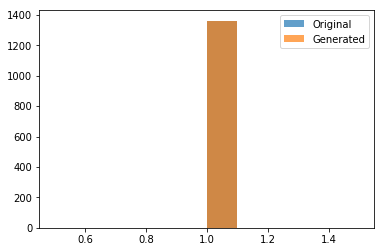

In [9]:
#Choose the data to measure
ORIGINAL_DATA = Bot
GENERATED_DATA = GAN_Bot


NUMBER_ROWS = len(ORIGINAL_DATA)
GENERATED_DATA = GENERATED_DATA[:NUMBER_ROWS]

for feature in ORIGINAL_DATA.columns:
    array = [value for value in ORIGINAL_DATA[feature]]
    temp =  [value for value in GENERATED_DATA[feature]]
    
    array.sort()
    temp.sort()
   
    x=tuple(array)
    y= tuple(temp)

    distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(x, y)]))
    euclidean_distance = distance/NUMBER_ROWS

    print('Euclidean Distance of ' + feature + ': ' + str(euclidean_distance))
    pyplot.figure()
    pyplot.hist(array, alpha=0.7, label='Original')
    pyplot.hist(temp, alpha=0.7, label='Generated')
    pyplot.legend(loc='upper right')
    pyplot.show()

### Join the generated data to the train set

In [10]:
GAN_Bot_train = pd.concat([GAN_Bot, Bot_train])
WGAN_GP_Bot_train = pd.concat([WGAN_GP_Bot, Bot_train])

GAN_Brute_Force_train = pd.concat([GAN_BF_SSH_Patator, GAN_BF_FTP_Patator, Brute_Force_train])
WGAN_GP_Brute_Force_train = pd.concat([WGAN_BF_SSH_Patator, WGAN_BF_FTP_Patator, Brute_Force_train])

GAN_WebAttack_train = pd.concat([GAN_WA_Brute_Force, GAN_WA_XSS, WebAttack_train])
WGAN_GP_WebAttack_train = pd.concat([WGAN_WA_Brute_Force, WGAN_WA_XSS, WebAttack_train])

GAN_DoS_train = pd.concat([GAN_DoS_GoldenEye, GAN_DoS_Hulk, GAN_DoS_Slowhttptest, GAN_DoS_Slowlori, Dos_train])
WGAN_GP_DoS_train = pd.concat([WGAN_DoS_GoldenEye, WGAN_DoS_Hulk, WGAN_DoS_Slowhttptest, WGAN_DoS_Slowlori, Dos_train])
 
counter = Counter(WGAN_GP_DoS_train[' Label'])
print(counter)

Counter({0: 192354, 1: 192353, 2: 192353, 3: 192353, 4: 192353})


### Train set shuffle

In [11]:
for i in [GAN_Bot_train, WGAN_GP_Bot_train, GAN_Brute_Force_train, WGAN_GP_Brute_Force_train, GAN_WebAttack_train, WGAN_GP_WebAttack_train, GAN_DoS_train, WGAN_GP_DoS_train]:
    i=shuffle(i)

### Save the GAN balanced training set

In [12]:
GAN_Bot_train.to_csv(r'GAN_generation\GAN_Balanced_Data/GAN_Bot_train.csv', index = False)
WGAN_GP_Bot_train.to_csv(r'GAN_generation\WGAN_GP_Balanced_Data/WGAN_GP_Bot_train.csv', index = False)

GAN_Brute_Force_train.to_csv(r'GAN_generation\GAN_Balanced_Data/GAN_Brute_Force_train.csv', index = False)
WGAN_GP_Brute_Force_train.to_csv(r'GAN_generation\WGAN_GP_Balanced_Data/WGAN_GP_Brute_Force_train.csv', index = False)

GAN_WebAttack_train.to_csv(r'GAN_generation\GAN_Balanced_Data/GAN_WebAttack_train.csv', index = False)
WGAN_GP_WebAttack_train.to_csv(r'GAN_generation\WGAN_GP_Balanced_Data/WGAN_GP_WebAttack_train.csv', index = False)

GAN_DoS_train.to_csv(r'GAN_generation\GAN_Balanced_Data/GAN_DoS_train.csv', index = False)
WGAN_GP_DoS_train.to_csv(r'GAN_generation\WGAN_GP_Balanced_Data/WGAN_GP_DoS_train.csv', index = False)